# Exploratory Data Analysis

In [1]:

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

from csf.data.studies import CSFStudies
from csf.data.scans import CSFScan
from csf.data.bboxes import CSFBoundingBoxes
from csf.data.segmentations import CSFSegmentations, CSFPatientSegmentations

In [2]:
%matplotlib inline
# Seaborn
sns.set_palette("Blues_r")
sns.set_style("whitegrid")
FIGSIZE = (12,8)
DARKBLUE = "#1C3879"
LIGHTBLUE = "steelblue"
# Pandas
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_colwidth", 100)
# Directories and Filepaths
TRAIN_IMAGES_DIR = "data/raw/train_images"
TEST_IMAGES_DIR = "data/raw/test_images"
SEGMENTATIONS_DIR = "data/raw/segmentations"
TRAINING_METADATA_FILEPATH = "data/raw/train.csv"
TEST_METADATA_FILEPATH = "data/raw/test.csv"
TRAIN_BOUNDING_BOXES_FILEPATH = "data/raw/train_bounding_boxes.csv"


## Training Metadata

In [3]:
studies = CSFStudies(filepath=TRAINING_METADATA_FILEPATH)

In [4]:
print("There are {} patients in the dataset, {} or {} percent of which have been diagnosed as having at least one cervical spine fracture.".format(studies.n_patients, studies.n_patients_with_fracture, studies.p_patients_with_fracture))

There are 2019 patients in the dataset, 961 or 47.6 percent of which have been diagnosed as having at least one cervical spine fracture.


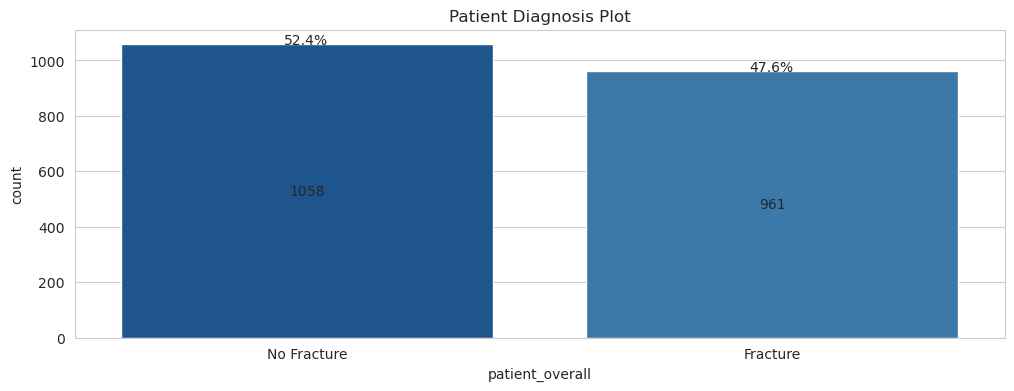

In [5]:
studies.patient_diagnoses_plot(figsize=(12,4))


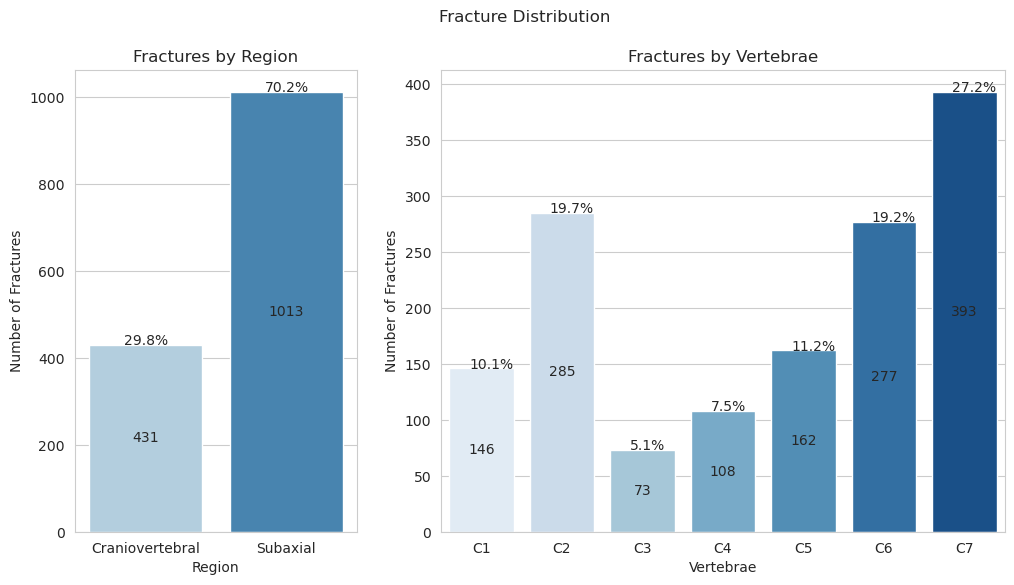

In [6]:
studies.fractures_plot()

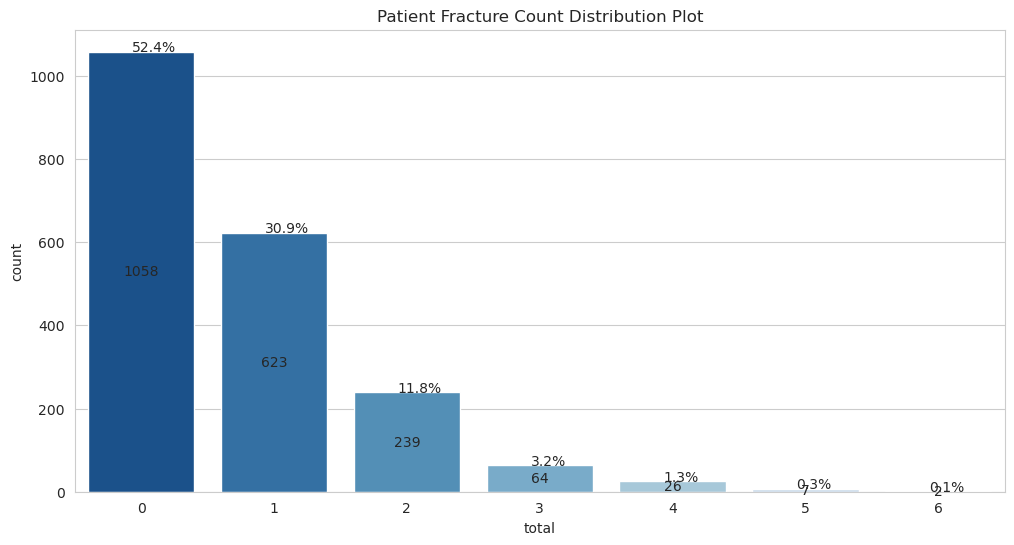

In [7]:
studies.patient_fracture_count_plot()

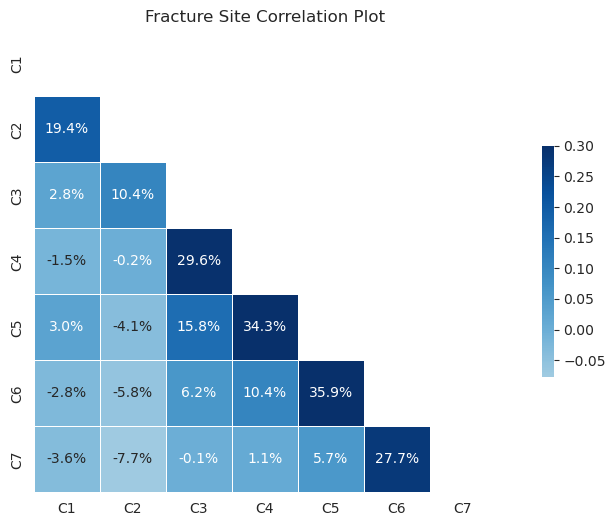

In [8]:
studies.fracture_correlation_plot()

## Bounding Boxes

In [9]:
bb = CSFBoundingBoxes(filepath = TRAIN_BOUNDING_BOXES_FILEPATH)
bb.load()
bb.shape

(7217, 6)

In [10]:
bb.head()

,StudyInstanceUID,x,y,width,height,slice_number
0,1.2.826.0.1.3680043.10051,219.28,216.71,17.30,20.39,133
1,1.2.826.0.1.3680043.10051,221.56,216.71,17.88,25.24,134
2,1.2.826.0.1.3680043.10051,216.82,221.63,27.01,26.37,135
3,1.2.826.0.1.3680043.10051,214.49,215.49,27.93,37.51,136
4,1.2.826.0.1.3680043.10051,214.00,215.49,27.00,43.51,137


Summarize the range (max slice number - min slice number) and the number of slices (count)

In [11]:
bb.summarize()

,min,max,count,range
StudyInstanceUID,,,,
1.2.826.0.1.3680043.10051,133,148,16,16
1.2.826.0.1.3680043.10579,78,80,3,3
1.2.826.0.1.3680043.10678,67,183,62,117
1.2.826.0.1.3680043.10697,126,133,8,8
1.2.826.0.1.3680043.10732,60,92,31,33
...,...,...,...,...
1.2.826.0.1.3680043.8519,52,57,6,6
1.2.826.0.1.3680043.8693,43,48,6,6
1.2.826.0.1.3680043.9447,122,154,33,33


In [12]:
print("There are {} errors in which the number of slices is less than the range".format(bb.n_errors)) 

There are 0 errors in which the number of slices is less than the range


In [13]:
print("There are {} patients with multiple bounding boxes, corresponding to a total of {} bounding boxes".format(bb.n_multiple_boxes, len(bb.get_multiple_boxes())))

There are 108 patients with multiple bounding boxes, corresponding to a total of 4565 bounding boxes


### Distribution of Bounding Boxes vis-a-vis Training Set

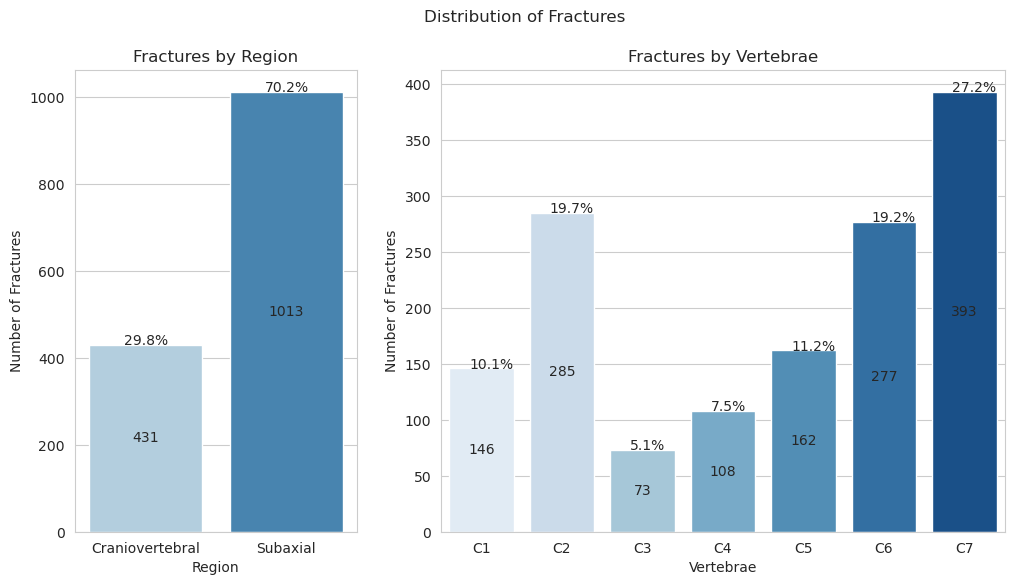

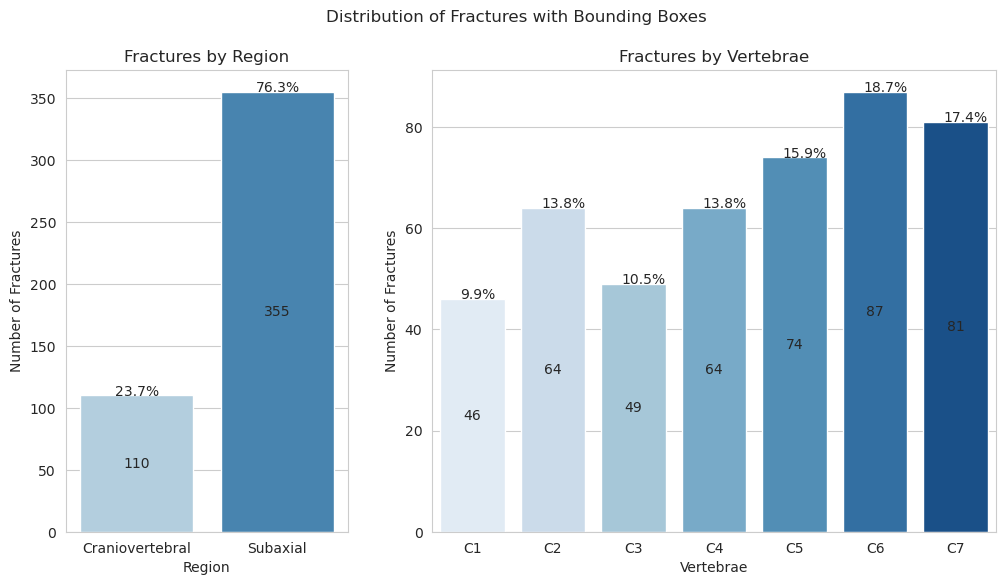

In [14]:
patients_with_bbox = bb.get_patients()
bbox_studies = CSFStudies(filepath=TRAINING_METADATA_FILEPATH, patient_ids = patients_with_bbox)
studies.fractures_plot(title="Distribution of Fractures")
bbox_studies.fractures_plot(title="Distribution of Fractures with Bounding Boxes")


## Segmentation

In [15]:
segs = CSFSegmentations()
print("There are {} patients with segmentations".format(segs.n_patients))

There are 87 patients with segmentations


In [17]:
# Examine sample patient
patient_id = segs.get_patients(n=1)[0]
pseg = CSFPatientSegmentations(patient_id=patient_id)
print("Patient: {} has {} segmented slices.".format(patient_id, pseg.n_slices))
label = pseg.get_label(200)
print("Slice 200 is labeled with the following vertebra: {}".format(label[1:]))

Patient: 1.2.826.0.1.3680043.26068 has 623 segmented slices.
Slice 200 is labeled with the following vertebra: [3. 4.]


array([0., 3., 4.])

24 Segmentation Masks Starting at 200.


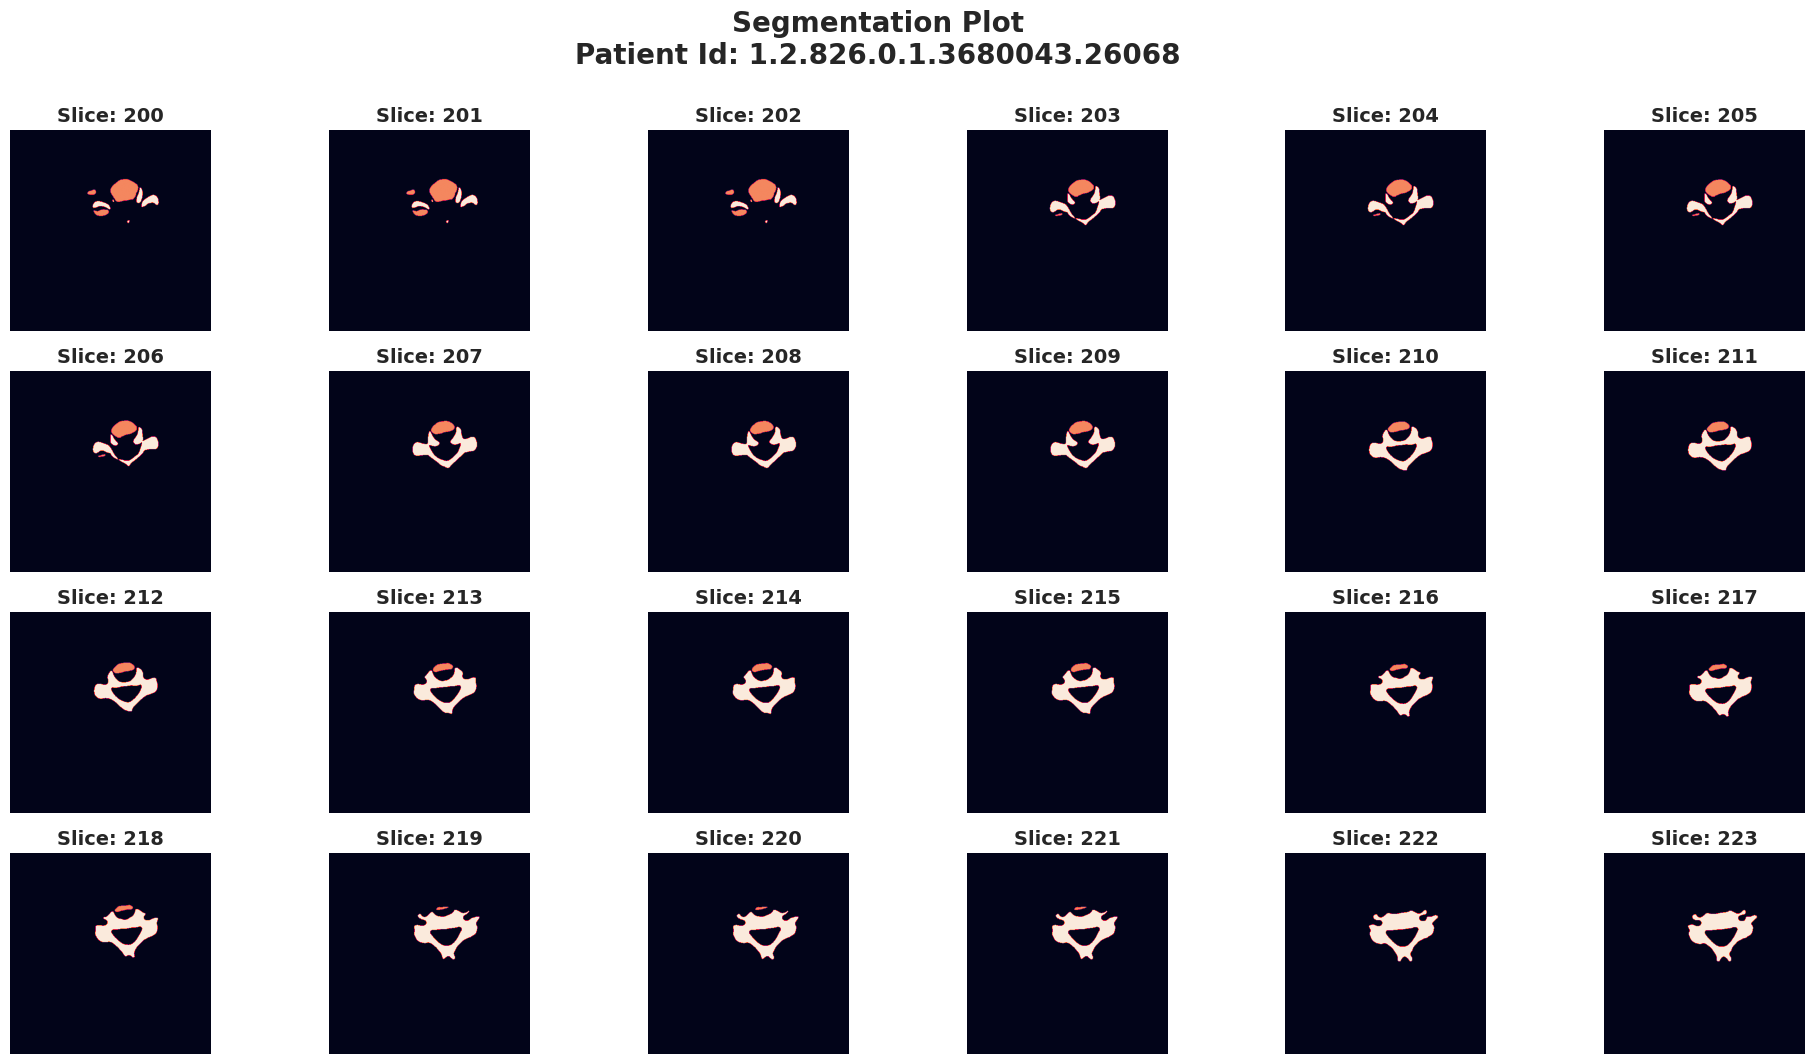

In [19]:
# Plot segmentation image
display(HTML('<h2>Segmentation Plot</h2>'))
pseg.plot_seg(start_slice=200)
print("24 Segmentation Masks Starting at 200.")